# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

### 0) Preliminary data exploration

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
w = data[data.race=='w']
b = data[data.race=='b']

In [184]:
# number of callbacks for black-sounding names
print('Number of callbacks for black-sounding names: ' +
      '{:0.0f} resumes out of {:0.0f}'.format(np.sum(b.call), len(b.call)))
print('Number of callbacks for white-sounding names: ' +
      '{:0.0f} resumes out of {:0.0f}'.format(np.sum(w.call), len(w.call)))

Number of callbacks for black-sounding names: 157 resumes out of 2435
Number of callbacks for white-sounding names: 235 resumes out of 2435


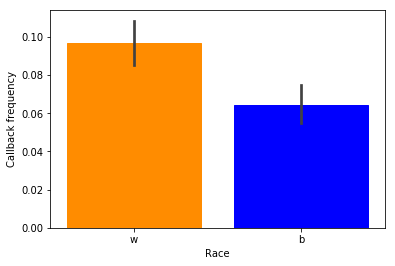

Callback frequency for white-sounding names: 0.097
Callback frequency for black-sounding names: 0.064


In [204]:
fig, ax = plt.subplots(1,1)
sns.barplot(x='race', y='call', data=data)
ax.patches[0].set_color('darkorange')
ax.patches[1].set_color('blue')
plt.xlabel('Race')
plt.ylabel('Callback frequency')
plt.show()
print('Callback frequency for white-sounding names: {:0.3f}'.format(np.sum(w.call)/len(w)))
print('Callback frequency for black-sounding names: {:0.3f}'.format(np.sum(b.call)/len(w)))

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p></div>

### 1) What test is appropriate for this problem? Does CLT apply?
As the data for this problem in binary, binomial hypothesis tests apply. The Central Limit Theorem is applicable to binomial distributions.

### 2) What are the null and alternate hypotheses?
Null hypothesis: race has no statistically significant impact on the rate of callbacks for resumes.  
Alternate hypothesis: race has a statistically significant impact on the rate of callbacks for resumes.

I will adopt a significance level of alpha = 0.05, below which it is acceptable to reject the null hypothesis.

### 3) Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

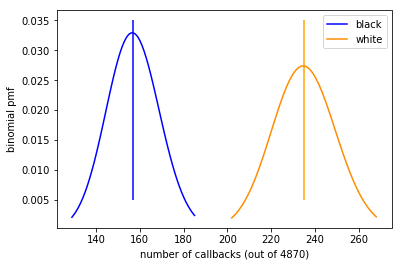

In [205]:
n_w = len(w)
# calculate p-value for white-sounding names (w)
p_w = np.sum(w.call)/len(w)
# calculate mean number of calls for w
mu_calls_w = p_w * n_w

n_b = len(b)
# calculate p-value for black-sounding names (b)
p_b = np.sum(b.call)/len(b)
# calculate mean number of calls for b
mu_calls_b = p_b * n_b

# plot binomial pdf for b
x_b = np.arange(stats.binom.ppf(0.01, n_b, p_b), stats.binom.ppf(0.99, n_b, p_b))
plt.plot(x_b, stats.binom.pmf(x_b, n_b, p_b), color='blue')
# add line for mean number of calls for b
plt.vlines(mu_calls_b, 0.005, 0.035, color='blue')

# plot binomial pdf for w
x_w = np.arange(stats.binom.ppf(0.01, n_w, p_w), stats.binom.ppf(0.99, n_w, p_w))
plt.plot(x_w, stats.binom.pmf(x_w, n_w, p_w), color='darkorange')
# add line for mean number of calls for w
plt.vlines(mu_calls_w, 0.005, 0.035, color='orange')

# add labels and legend to plot
plt.xlabel("number of callbacks (out of 4870)")
plt.ylabel("binomial pmf")
plt.legend(['black', 'white'])

plt.show()


#### Compute margin of error, confidence interval, and p-value using a frequentist approach

In [191]:
# set significance level alpha to 0.05
alpha = 0.05


# Compute margin of error for b
t_crit_b = stats.t.ppf(q = 1 - (alpha/2), df=n_b-1)
std_b = np.std(b.call)
s_sigma_b = std_b/np.sqrt(n_b)
margin_err_b = t_crit_b * s_sigma_b

# Compute margin of error for w
t_crit_w = stats.t.ppf(q = 1 - (alpha/2), df=n_w-1)
std_w = np.std(w.call)
s_sigma_w = std_w/np.sqrt(n_w)
margin_err_w = t_crit_w * s_sigma_w                       
                       
# Get confidence interval (using scipy to check results above)
ci_w = stats.binom.interval(1-alpha, n_w, p_w)
ci_b = stats.binom.interval(1-alpha, n_b, p_b)


print('p-value for black-sounding names: {:0.3f}'.format(p_b))
print('p-value for white-sounding names: {:0.3f}'.format(p_w))

print('\nThe 95% confidence interval for callback percent ' +
      'for black-sounding names is {:0.3f} to {:0.3f}'.format(ci_b[0], ci_b[1]))
print('The 95% confidence interval for callback percent '
      'for white-sounding names is {:0.3f} to {:0.03f}'.format(ci_w[0], ci_w[1]))
print('\nThe margin of error for callback percent ' +
      'for black-sounding names is {:0.3f}'.format(margin_err_b))
print('The margin of error for callback percent ' +
      'for white-sounding names is {:0.3f}'.format(margin_err_w))
print('\n-------------------------')
print('\nThe 95% confidence interval for number of callbacks ' +
      'for black-sounding names is {:0.0f} to {:0.0f}'.format(ci_b[0], ci_b[1]))
print('The 95% confidence interval for number of callbacks '
      'for white-sounding names is {:0.0f} to {:0.0f}'.format(ci_w[0], ci_w[1]))
print('\nThe margin of error for number of callbacks ' +
      'for black-sounding names is {:0.1f}'.format(margin_err_b*n_b))
print('The margin of error for number of callbacks ' +
      'for white-sounding names is {:0.1f}'.format(margin_err_w*n_w))

p-value for black-sounding names: 0.064
p-value for white-sounding names: 0.097

The 95% confidence interval for callback percent for black-sounding names is 134.000 to 181.000
The 95% confidence interval for callback percent for white-sounding names is 207.000 to 264.000

The margin of error for callback percent for black-sounding names is 0.010
The margin of error for callback percent for white-sounding names is 0.012

-------------------------

The 95% confidence interval for number of callbacks for black-sounding names is 134 to 181
The 95% confidence interval for number of callbacks for white-sounding names is 207 to 264

The margin of error for number of callbacks for black-sounding names is 23.8
The margin of error for number of callbacks for white-sounding names is 28.6


There is no overlap in the confidence intervals for the callbacks received for white-sounding and those received for black-sounding names given a significance level of 0.05. From the results of the frequentist approach, it is safe to reject the null hypothesis that race has no statistically significant impact on the rate of callbacks for resumes. The alternate hypothesis, that race has a statistically significant impact on the rate of callbacks for resumes, should be accepted.

#### # Compute margin of error, confidence interval, and p-value using bootstrapping approach

In [141]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

In [193]:
# Draw 10,000 separate bootstrap replicates for b and w data, using the mean as the test statistic.
reps_mu_w = draw_bs_reps(w.call, np.mean, size=10000)
reps_mu_b = draw_bs_reps(b.call, np.mean, size=10000)

# Compute the average mean (equal to the p-value) of the 10,000 bootstraps
reps_p_w = np.mean(reps_mu_w)
reps_p_b = np.mean(reps_mu_b)

# Compute the average number of callbacks for all bootstrapped samples.
reps_calls_mu_w = reps_mu_w * n_w
reps_calls_mu_b = reps_mu_b * n_b

# Compute a 95% confidence interval for the average percent of callbacks using all bootstrapped samples.
reps_p_ci_w = np.percentile(reps_mu_w, [2.5, 97.5])
reps_p_ci_b = np.percentile(reps_mu_b, [2.5, 97.5])

# Compute a 95% confidence interval for the average number of callbacks using all bootstrapped samples.
reps_calls_ci_w = np.percentile(reps_calls_mu_w, [2.5, 97.5])
reps_calls_ci_b = np.percentile(reps_calls_mu_b, [2.5, 97.5])

# Use p-value and confidence interval computed above to calculate margin of error for bootstrapped samples.
reps_p_margin_err_w = reps_p_w - reps_p_ci_w[0]
reps_p_margin_err_b = reps_p_b - reps_p_ci_b[0]

# Use p-value and confidence interval computed above to calculate margin of error for bootstrapped samples.
reps_margin_err_w = reps_p_w * n_w - reps_calls_ci_w[0]
reps_margin_err_b = reps_p_b * n_b - reps_calls_ci_b[0]

print('p-value for black-sounding names: {:0.3f}'.format(np.mean(reps_p_b)))
print('p-value for white-sounding names: {:0.3f}'.format(np.mean(reps_p_w)))

print('\nThe 95% confidence interval for callback percent ' +
      'for black-sounding names is {:0.3f} to {:0.3f}'.format(reps_p_ci_b[0], reps_p_ci_b[1]))
print('The 95% confidence interval for callback percent '
      'for white-sounding names is {:0.3f} to {:0.03f}'.format(reps_p_ci_w[0], reps_p_ci_w[1]))
print('\nThe margin of error for callback percent ' +
      'for black-sounding names is {:0.3f}'.format(reps_p_margin_err_b))
print('The margin of error for callback percent ' +
      'for white-sounding names is {:0.3f}'.format(reps_p_margin_err_w))
print('\n-------------------------')
print('\nThe 95% confidence interval for number of callbacks ' +
      'for black-sounding names is {:0.0f} to {:0.0f}'.format(reps_calls_ci_b[0], reps_calls_ci_b[1]))
print('The 95% confidence interval for number of callbacks '
      'for white-sounding names is {:0.0f} to {:0.0f}'.format(reps_calls_ci_w[0], reps_calls_ci_w[1]))
print('\nThe margin of error for number of callbacks ' +
      'for black-sounding names is {:0.1f}'.format(reps_margin_err_b))
print('The margin of error for number of callbacks ' +
      'for white-sounding names is {:0.1f}'.format(reps_margin_err_w))

p-value for black-sounding names: 0.065
p-value for white-sounding names: 0.097

The 95% confidence interval for callback percent for black-sounding names is 0.055 to 0.074
The 95% confidence interval for callback percent for white-sounding names is 0.085 to 0.108

The margin of error for callback percent for black-sounding names is 0.010
The margin of error for callback percent for white-sounding names is 0.011

-------------------------

The 95% confidence interval for number of callbacks for black-sounding names is 134 to 181
The 95% confidence interval for number of callbacks for white-sounding names is 208 to 264

The margin of error for number of callbacks for black-sounding names is 23.1
The margin of error for number of callbacks for white-sounding names is 27.2


The results from a bootstrapped approach are very similar to those obtained from the frequentist approach. There is no overlap in the confidence intervals for the callbacks received for white-sounding and those received for black-sounding names given a significance level of 0.05. These results confirm that it is safe to reject the null hypothesis that race has no statistically significant impact on the rate of callbacks for resumes.

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

### 4) Write a story describing the statistical significance in the context or the original problem.
Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical resumes to black-sounding or white-sounding names and observing the impact on requests for interviews from employers. From 4870 resumes, the result of this research was that 6% of resumes assigned black-sounding names received callbacks compared to 10% of resumes assigned white-sounding names.

Out of 2435 resumes with white-sounding names randomly assigned to them, 235 (9.7%) received call-backs. Out of 2435 resumes with black-sounding names randomly assigned to them, 157 (6.4%) received call-backs. Thus, with all other factors being equal, resumes with black-sounding names attached received 33% fewer callbacks than those with white-sounding names. 

These results were highly significant statistically. If the study were repeated, there is a 95% chance that the number of callbacks received for black-sounding names would be between 134 and 181 and that the number of callbacks received for white-sounding names would be between 208 and 264. Given the number of resumes, the chance that race has no statistically significant impact on the rate of callbacks for resumes was shown to be infintesimally small.

### 5) Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Because names that connoted race were randomly assigned to 4870 resumes, it is highly improbable that some other factor in this study was more important to callback success, though it's certainly possible that other factors (such as education and experience relevant to the job applied for) are more important outside the context of the study. 

Whether or not another factor was more important within the study could be tested by dropping any features of the data set that are largely incomplete, replacing non-numerical data with numerical (if ordinal) or one-hot encoding (if nominal), and then comparing the means of each feature as well as the variance. If any factor stood out as very different for either race, and especially if it has any significant correlation with the results, it is possible the test had a bias and should be repeated. The odds of this occuring with random assignment of names in a sample of 4870, however, are exceedingly small.